Keras
- The Python Deep Learning, Neural Network library
- Model - the 'Sequential' model is linear stach of layers.

Mobility Convolutional Neural Network
- A class of deep neural networks, most commonly applied to analysing visual imagery

Convolutional Neural Network

- 뇌에서 발생하는 전기 신호
- 주로 시각적 이미지 분석에 적용되는 딥 뉴럴 네트워크의 한 종류입니다.

Convolutional  
수학에서는 간단히 말해 두 가지 함수가 섞인 것.  
머신러닝에서 컨볼루션은 가중치를 학습키기 위해 컨볼루셔널 필터와 입력 행렬을 혼합  
컨볼루셔널 연산이나 컨볼루셔널 레이어와 같은 표현



컨볼루셔널 신경망

하나 이상의 레이어가 컨볼루셔널 레이어인 신경망.    일반적인 컨볼루셔널 신경망은 다음과 같은 레이어의 조합으로 구성됩니다.

- 컨볼루셔널 레이어
- 레이어 풀링
- 밀집 레이어

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [44]:
# Download MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Define Constants
batch_size = 128
epochs = 10000
num_classes = 10

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

len(train_images), len(test_images)

(60000, 10000)

In [45]:
# Define the model architecture with CNN
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)), # 입력 레이어 28*28인 2차 배열을 1차 배열로 평탄화
                         # Hidden Layers
                         # keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Reshape(target_shape=(28, 28, 1)), # 흑백 사진으로 2D 형식으로 변환
                         keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu), # 합성곱 레이어
                         keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.MaxPooling2D(pool_size=(2, 2)), # 풀링 레이어
                         keras.layers.Dropout(0.25), # 드롭 아웃 레이어 -> 과적합을 방지하고 모델의 일반화 성능을 향상
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Dropout(0.5),

                         keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
# Save the best model as digits model.h5
filepath = 'model.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath, save_best_only=True)

In [47]:
# Early Stopping

# Define a callback to monitor val_loss
monitorEarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
# monitor : val_loss 추적
# patience : epoch 5 진행 과정에서 개선이 안되면 중단

history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels),
                    epochs=epochs, batch_size=batch_size,
                    callbacks = [modelCheckpoint, monitorEarlyStop])

Epoch 1/10000
469/469 [==============================] - 7s 11ms/step - loss: 0.2317 - accuracy: 0.9283 - val_loss: 0.0472 - val_accuracy: 0.9842
Epoch 2/10000
469/469 [==============================] - 4s 9ms/step - loss: 0.0867 - accuracy: 0.9736 - val_loss: 0.0366 - val_accuracy: 0.9876
Epoch 3/10000
469/469 [==============================] - 5s 10ms/step - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.0384 - val_accuracy: 0.9878
Epoch 4/10000
469/469 [==============================] - 4s 9ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 5/10000
469/469 [==============================] - 4s 9ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0281 - val_accuracy: 0.9909
Epoch 6/10000
469/469 [==============================] - 4s 10ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0281 - val_accuracy: 0.9918
Epoch 7/10000
469/469 [==============================] - 4s 10ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0267 - va

In [48]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

# Download the digit classification model if you're using Colab,
# or print the model's local path if you're not using Colab.
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error dowbload:', os.path.join(os.getcwd(), path))

In [49]:
# model saver
savefile = 'saved_digits.h5'
model.save(savefile)

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                      

In [51]:
!ls -al

total 28236
drwxr-xr-x 1 root root     4096 Jan 12 04:57 .
drwxr-xr-x 1 root root     4096 Jan 12 04:12 ..
drwxr-xr-x 4 root root     4096 Jan 10 14:22 .config
drwx------ 5 root root     4096 Jan 12 04:12 drive
-rw-r--r-- 1 root root 14446304 Jan 12 06:00 model.h5
drwxr-xr-x 1 root root     4096 Jan 10 14:23 sample_data
-rw-r--r-- 1 root root 14446304 Jan 12 06:00 saved_digits.h5


In [52]:
load_model = tf.keras.models.load_model(savefile)

In [53]:
load_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                      

In [54]:
# Evaluate the model using test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9925
Test Accuracy:  0.9925000071525574


In [55]:
# Evaluate the model using test dataset.
test_loss, test_acc = load_model.evaluate(test_images, test_labels)
print('load_model Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9925
load_model Test Accuracy:  0.9925000071525574


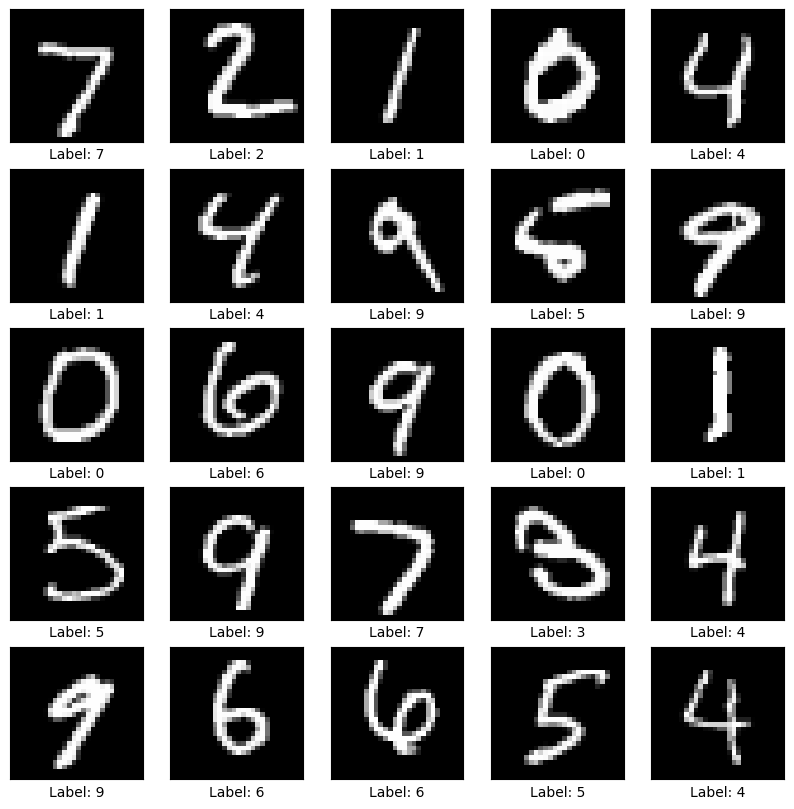

In [56]:
# Show the first 25 images in the training dataset.
show_sample(test_images, ['Label: %s' % label for label in test_labels])

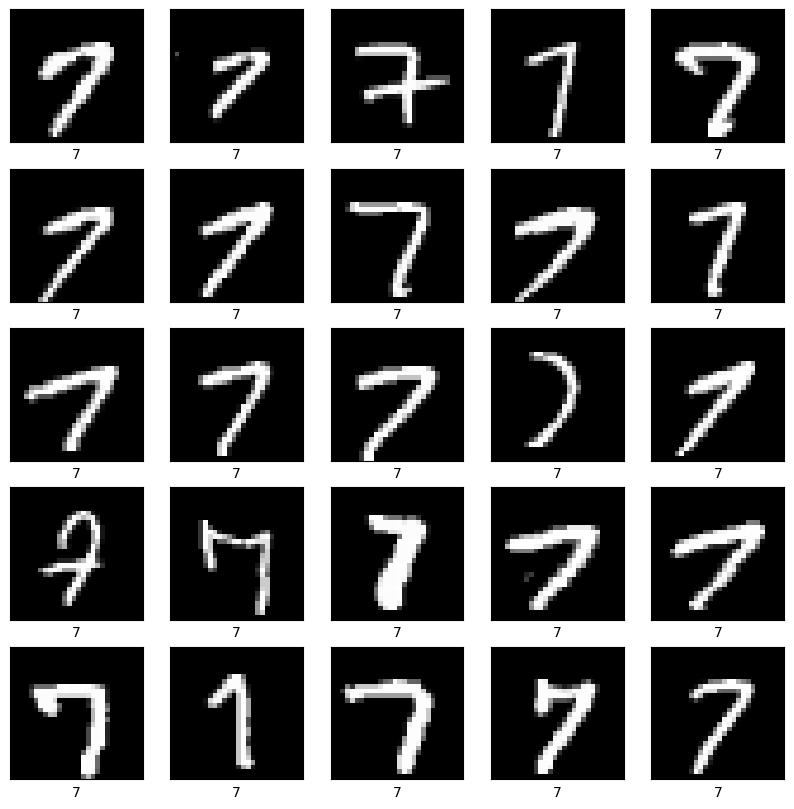

In [57]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(train_images, train_labels, 7)

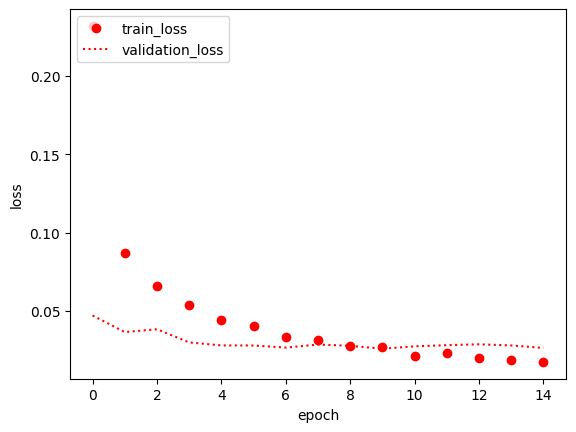

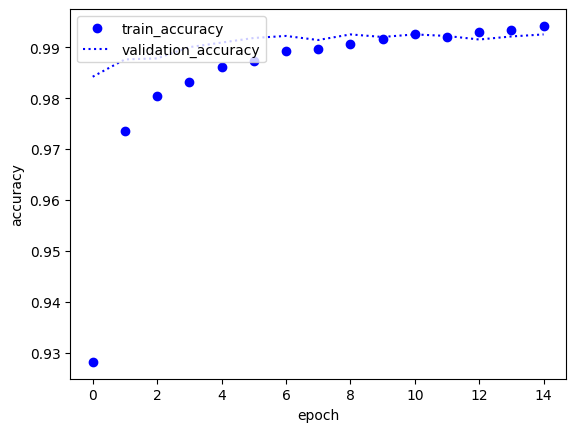

In [58]:
# Evaluate the model using test dataset. - Show performance

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train_loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='validation_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train_accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='validation_accuracy')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='upper left')

plt.show()

313/313 [==============================] - 1s 2ms/step


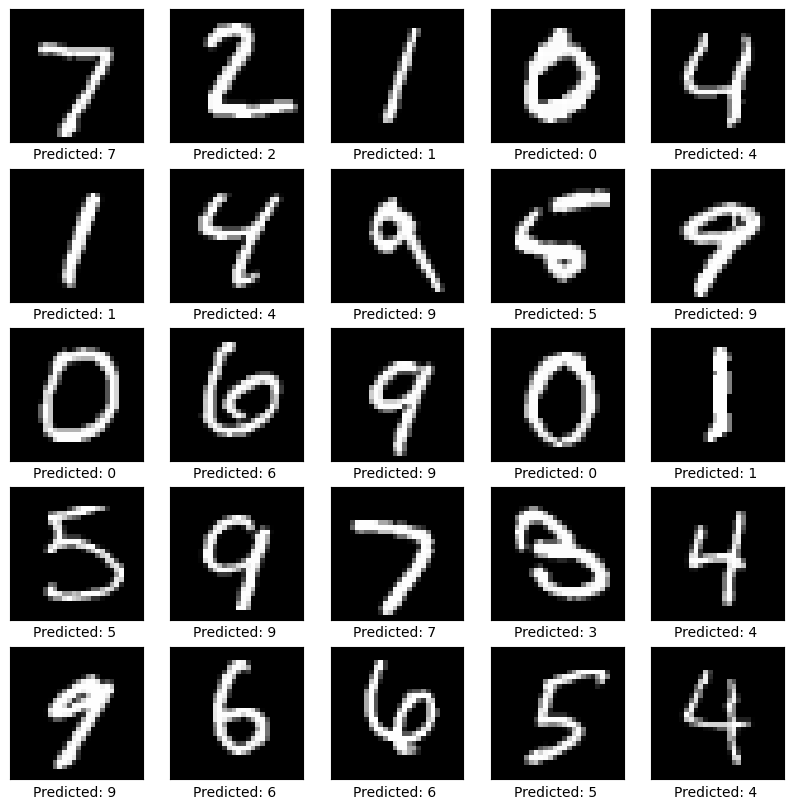

In [59]:
# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# Then plot the first 25 test images and their predicted labels.
show_sample(test_images, ['Predicted: %d ' % np.argmax(result) for result in predictions])

Number is  0


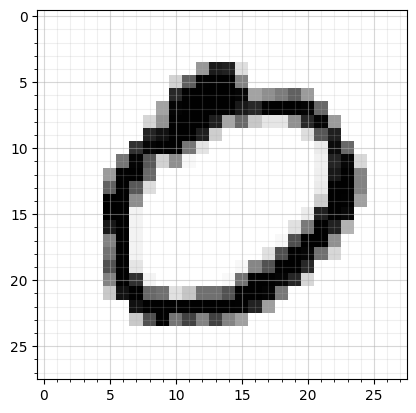

In [60]:
Digit = 5416 #@param {type:"slider", min:1, max:10000, step:1}
selected_digit = Digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2d' % result_number)

show_digit_image(test_images[selected_digit])